In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import random
import numpy as np
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy.stats import skew
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
%matplotlib inline

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

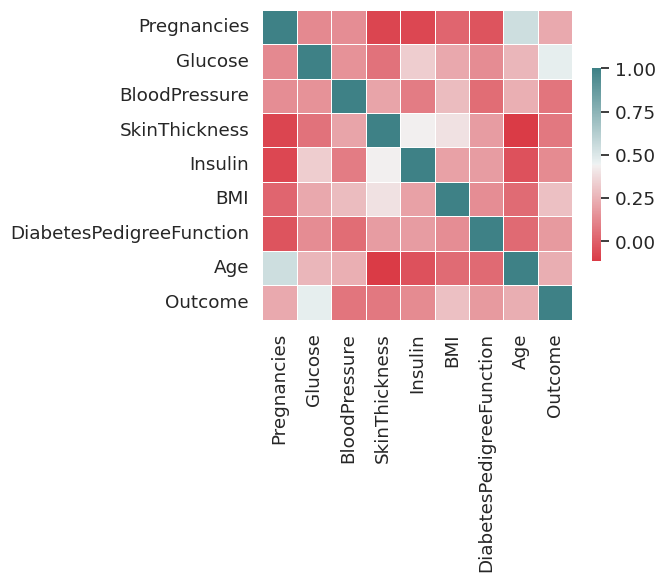

In [ ]:
#Correlation matrix
corr = df.corr(method = 'pearson')
#ax = df.iloc[:, 0:7]
f,ax= plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(10, 200, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

0.8999119408414357
0.17341395519987735
-1.8400052311728738
0.109158762323673
2.2678104585131753
-0.42814327880861786
1.9161592037386292
1.127389259531697


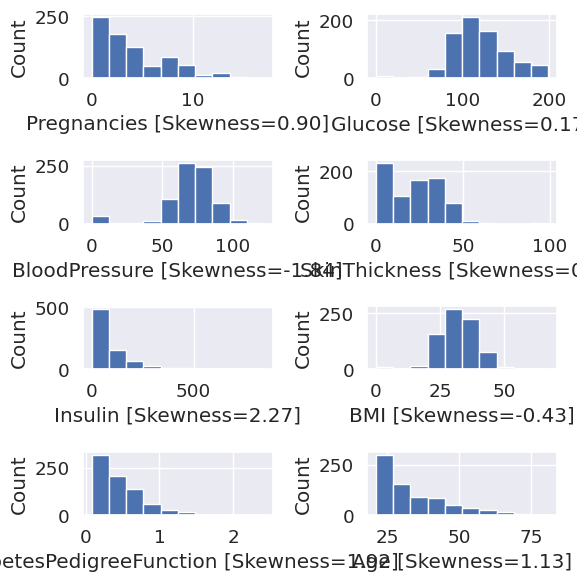

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(6, 6))
for i in range(4):
  for j in range(2):
    feature = df.columns[i*2+j]
    ax[i, j].hist(df[feature])
    # ax[i, j].set_title(feature)
    sk = skew(df[feature], bias=True)
    print(sk)
    ax[i, j].set_xlabel(f'{feature} [Skewness={sk:.2f}]')
    ax[i, j].set_ylabel('Count')
fig.tight_layout()

In [ ]:
class KSON:
    def __init__(self, num_inputs, num_outputs, learning_rate=0.01, epochs=100):
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.learning_rate = learning_rate
        self.epochs = epochs

        # init weights
        self.weight = np.random.rand(self.num_outputs, self.num_inputs)
        print(self.weight)

    def fit(self, X):
        for i in range(self.epochs):
            # print(f'Epoch {i+1}')
            for idx, x in enumerate(X):
                d = [np.linalg.norm(e) for e in x - self.weight]

                winner = np.argmin(d)
                self.weight[winner] += self.learning_rate * (x - self.weight[winner])
            # print(self.weight)

    def predict(self, X):
        pred = []
        for idx, x in enumerate(X):
            d = [np.linalg.norm(e) for e in x - self.weight]
            winner = np.argmin(d)
            pred.append(winner)
        return np.array(pred)

In [ ]:
kson = KSON(4, 2)
X = np.random.rand(40).reshape(-1, 4)
df = pd.DataFrame(X)
print(df.head())
kson.fit(X)

[[0.78389697 0.38385398 0.5896078  0.18459166]
 [0.07953879 0.90879792 0.09082897 0.98502828]]
          0         1         2         3
0  0.488373  0.068518  0.292747  0.290816
1  0.317808  0.966336  0.136228  0.974774
2  0.019489  0.464620  0.051909  0.886105
3  0.669845  0.185782  0.576509  0.973329
4  0.968264  0.276803  0.335606  0.351554


In [ ]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
kson = KSON(8, 2, 1)
kson.fit(X_train)
pred = kson.predict(X_test)
print(pred)
print(y_test)
print(accuracy_score(y_test, pred))

[[0.50184165 0.15996318 0.08876747 0.39115709 0.71191018 0.28889924
  0.92650121 0.77508878]
 [0.92864016 0.03013154 0.94604978 0.13104965 0.85164377 0.68751544
  0.82331843 0.6382965 ]]
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0]
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0]
0.6363636363636364


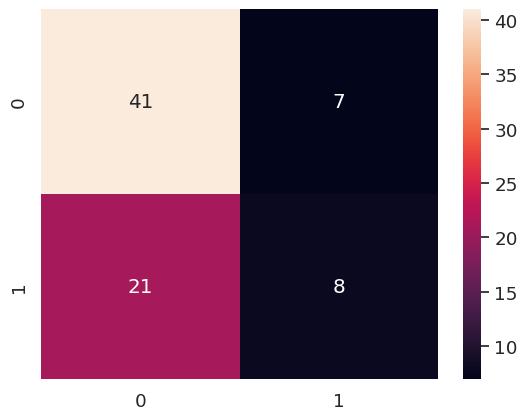

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.show()


In [ ]:
class HopfieldNetwork:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.X = None
        self.weight = np.zeros((self.num_inputs, self.num_inputs))
        # print(self.weight)

    def fit(self, X):
        self.X = X
        # print(self.X)
        for pattern in X:
            self.weight += np.dot(pattern.reshape(-1, 1), pattern.reshape(1, -1))

        np.fill_diagonal(self.weight, 0)
        # print(self.weight)


    def predict(self, inp):
        inp_copy = copy.deepcopy(inp)
        for i in range(5):
            print(f'Iteration {i+1}')
            fixed = np.dot(inp, self.weight)
            fixed[fixed >= 0] = 1
            fixed[fixed < 0] = -1
            if np.array_equal(inp, fixed):
                print("Found")
                print(f'Input: {inp_copy}')
                print(f'Fixed: {fixed}')
                break

            inp = fixed
            print(inp)

hp = HopfieldNetwork(7)
X = np.array([
    [-1, -1, 1, -1, 1,1,-1],
    [1, -1, 1, -1, 1,-1,1],
    [-1, 1, -1, 1, -1 , 1,-1],
    [1, 1 ,1, -1, -1,1,-1],
    [1, 1,-1, -1, 1,-1,1]
], dtype='float32')
hp.fit(X)
hp.predict([-1, 1, 1, -1, -1, 1,-1])

Iteration 1
[-1.  1.  1.  1. -1.  1. -1.]
Iteration 2
[-1.  1. -1.  1. -1.  1. -1.]
Iteration 3
Found
Input: [-1, 1, 1, -1, -1, 1, -1]
Fixed: [-1.  1. -1.  1. -1.  1. -1.]
